In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import MSTL

In [2]:
neft_data = pd.read_excel('D:\Personal\Education\PGDBA 2023-25\Sem1\SPA\TimeSeries Project\Payment Systems Volume Payment Transactions RBI Operated National Electronic Funds Transfer NEFT.xlsx')[:-7]

In [3]:
neft_data['Date'] = neft_data['Date'].map(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%d-%m  00:00:00') if isinstance(x, str) else x)
neft_data['Date'] = pd.to_datetime(neft_data['Date'], format='%Y-%d-%m %H:%M:%S')
neft_data.rename(columns = {"Payment Volume (Unit mn)": "Volume"}, inplace = True)
print(neft_data)

           Date     Volume
0    2020-06-01  17.211000
1    2020-06-02  10.006772
2    2020-06-03  10.036426
3    2020-06-04   9.465655
4    2020-06-05  11.126259
...         ...        ...
1252 2023-11-05  11.863879
1253 2023-11-06  25.645393
1254 2023-11-07  30.939605
1255 2023-11-08  30.113271
1256 2023-11-09  28.903590

[1257 rows x 2 columns]


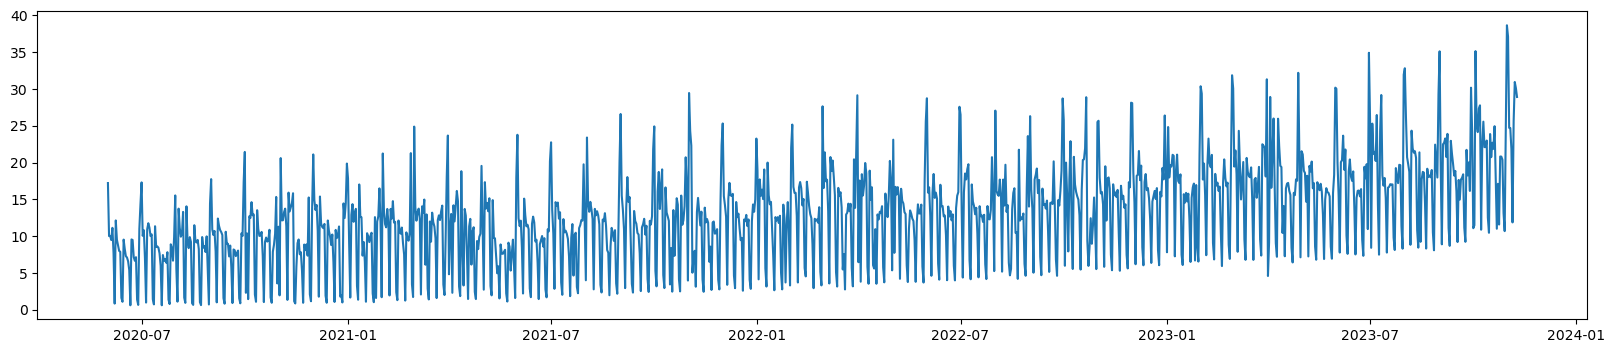

In [4]:
#Plot Entire Graph
plt.figure(figsize=(20,4))
plt.plot(neft_data['Date'], neft_data['Volume'])

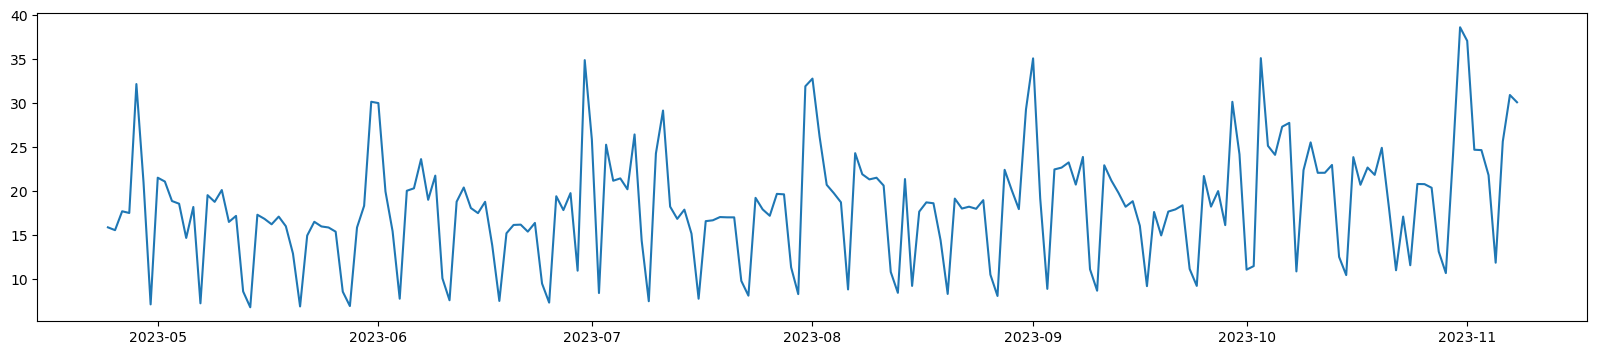

In [5]:
#Plot A Sub-Section
plt.figure(figsize=(20,4))
neft_data_last_200 = neft_data[-200:-1]
plt.plot(neft_data_last_200['Date'], neft_data_last_200['Volume'])

In [6]:
#Train Test Split
neft_test = neft_data[-30:-1]
neft_train = neft_data[0:len(neft_data) - 30]

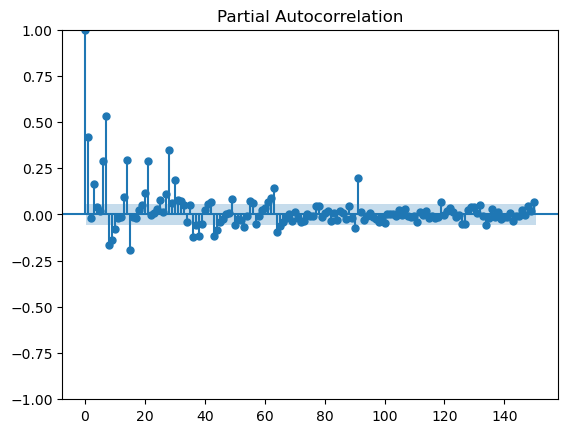

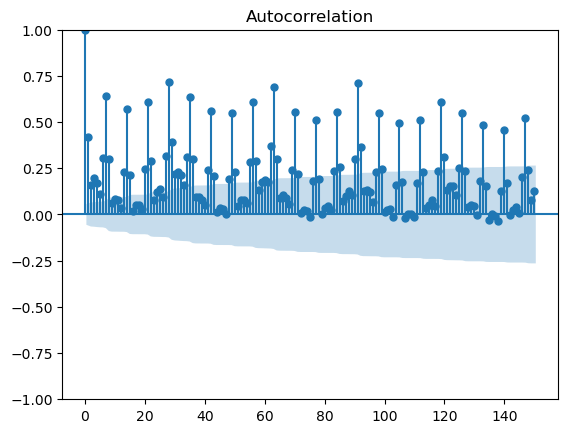

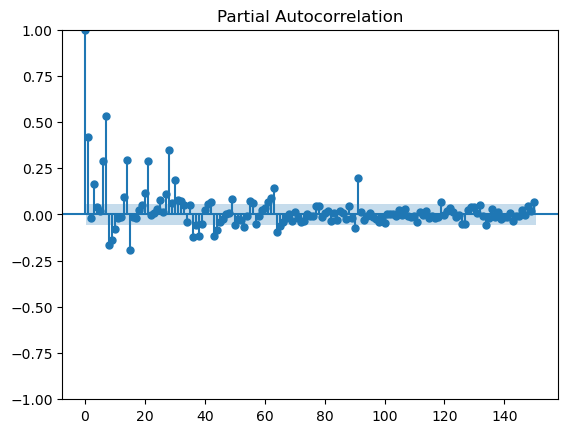

In [7]:
plot_acf(neft_train['Volume'], lags=150)
plot_pacf(neft_train['Volume'], lags=150)

In [9]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(7, 30.42), use_trend=True)
model = estimator.fit(neft_train.Volume)
neft_forcast = model.forecast(steps=30)

In [10]:
print(model.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: False
Seasonal periods: [ 7.   30.42]
Seasonal harmonics [3 6]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.637616
Smoothing (Alpha): 0.023138
Trend (Beta): 0.000079
Damping Parameter (Phi): 1.000000
Seasonal Parameters (Gamma): [ 1.21777380e-08  7.23376416e-08  1.05919792e-08 -3.76983480e-08]
AR coefficients []
MA coefficients []
Seed vector [ 3.43018597e+00  4.98496987e-05 -5.90586157e-01  1.07760165e+00
  9.77486004e-01  1.87924115e+00  1.17456558e+00  5.57745619e-03
  8.14632008e-01  4.11682172e-01  3.61831261e-01  3.00997902e-01
  1.66644398e-01  1.19769178e-01  5.79769507e-01  2.29735860e-01
 -1.64551648e-01 -1.54436325e-01 -1.39836640e-01  1.95653184e-02]

AIC 11245.194888


MAE: 3.21
MSE: 17.49
RMSE: 4.18
MAPE: 15.73%
sMAPE: 16.43%


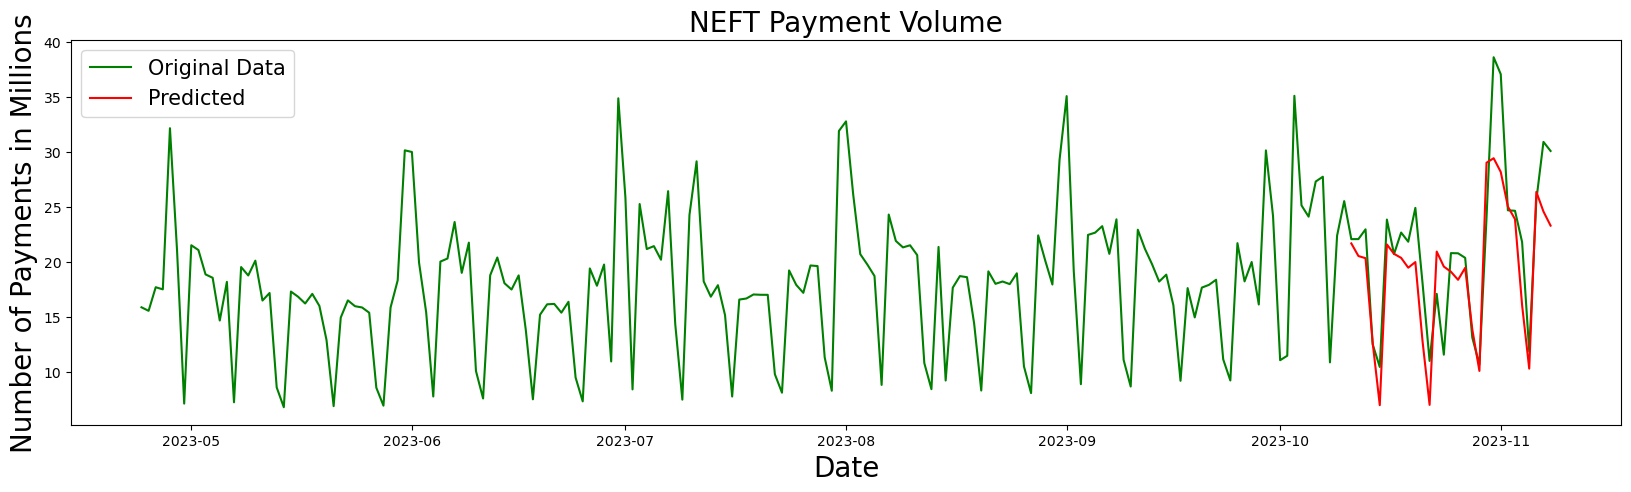

In [14]:
plt.figure(figsize=(20,5))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Payments in Millions', fontsize=20)
plt.title('NEFT Payment Volume', fontsize=20)
plt.plot(neft_data['Date'][-200:-1], neft_data['Volume'][-200:-1], color = 'green', label="Original Data")
# plt.plot(neft_train['Date'][-200:], model.[-200:], color = 'black', label="Training Data")
plt.plot(neft_test['Date'], neft_forcast[:29], color = 'red', label="Predicted")
# plt.plot(neft_train['Date'], model., color = 'red')
plt.legend(loc="upper left", fontsize = 15)

# Calculate errors
errors = neft_test.Volume - (neft_forcast[:29])
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(errors / neft_test.Volume)) * 100
smape = np.mean(2 * np.abs(errors) / (np.abs(neft_test.Volume) + np.abs(neft_forcast[:29]))) * 100

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')


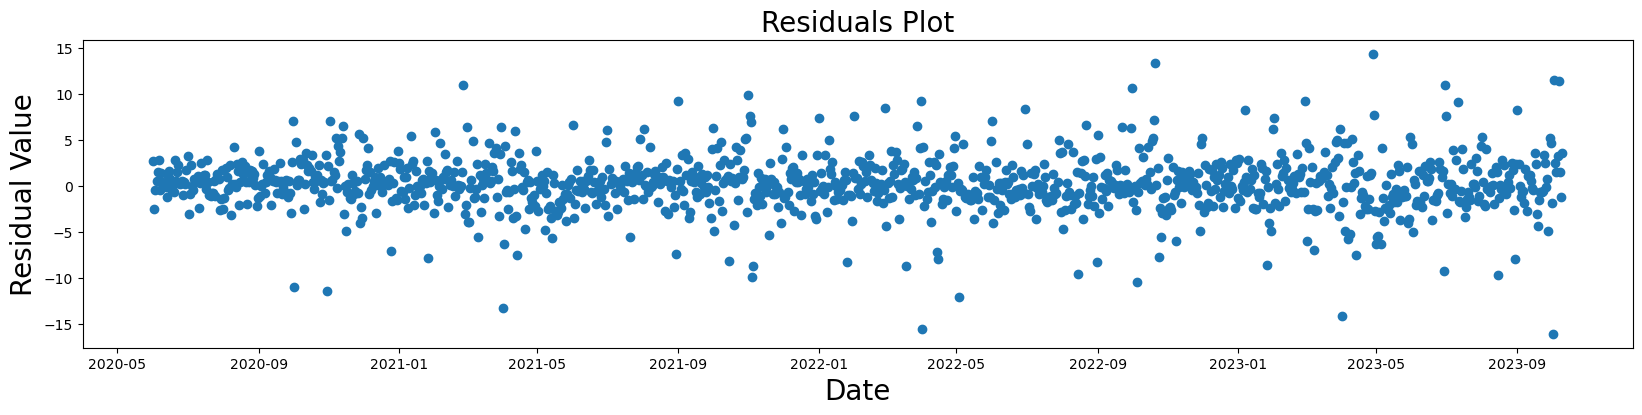

In [15]:
plt.figure(figsize=(20,4))
plt.title("Residuals Plot", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Residual Value", fontsize=20)
plt.scatter(neft_train['Date'], model.resid)

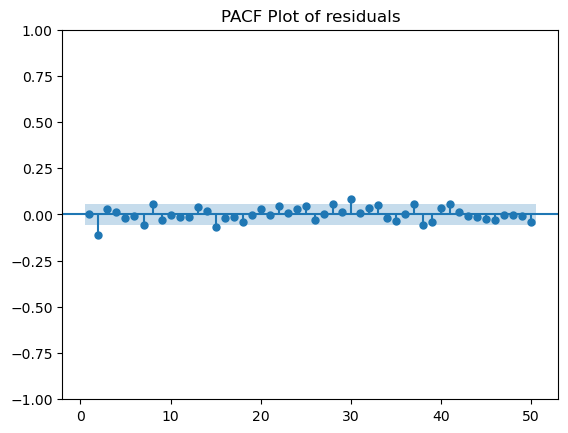

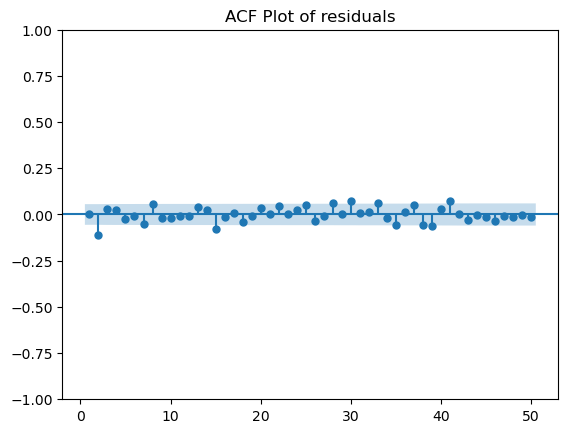

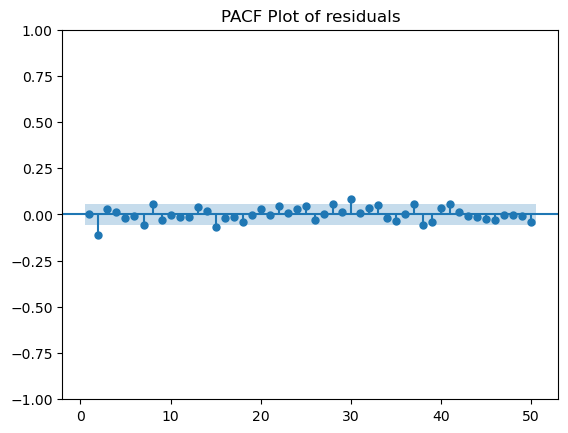

In [16]:
plot_acf(model.resid, lags=50, zero=False, title="ACF Plot of residuals")
plot_pacf(model.resid, lags=50, zero=False, title="PACF Plot of residuals")

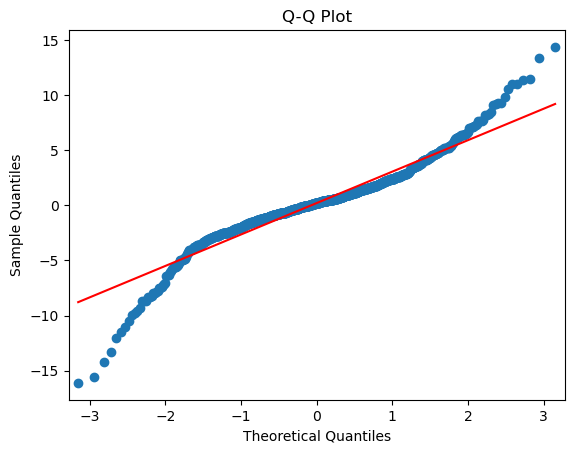

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(model.resid, line='r')
plt.title("Q-Q Plot")

plt.show()

In [18]:
sm.stats.acorr_ljungbox(model.resid, lags=range(1, 50), return_df=True)

,lb_stat,lb_pvalue
1,1.674825e-07,0.999673
2,1.464597e+01,0.000660
3,1.554901e+01,0.001403
4,1.632333e+01,0.002615
5,1.716004e+01,0.004206
6,1.730097e+01,0.008238
7,2.068851e+01,0.004260
8,2.466704e+01,0.001770
9,2.501855e+01,0.002951
10,2.545179e+01,0.004552


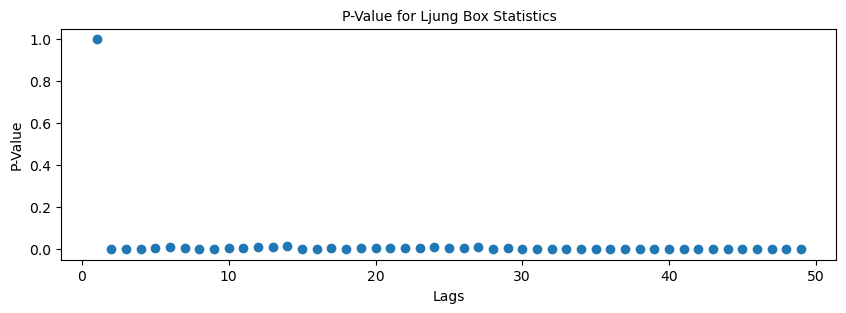

In [19]:
plt.figure(figsize = (10, 3))
plt.title("P-Value for Ljung Box Statistics", fontsize=10)
plt.xlabel("Lags", fontsize=10)
plt.ylabel("P-Value", fontsize=10)
plt.scatter(range(1, 50), sm.stats.acorr_ljungbox(model.resid, lags=range(1, 50), return_df=True).lb_pvalue)